<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Metadata" data-toc-modified-id="Metadata-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Metadata</a></span></li><li><span><a href="#Counts" data-toc-modified-id="Counts-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Counts</a></span></li><li><span><a href="#Alpha-div" data-toc-modified-id="Alpha-div-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Alpha div</a></span></li></ul></li><li><span><a href="#Format" data-toc-modified-id="Format-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Format</a></span><ul class="toc-item"><li><span><a href="#Overlap" data-toc-modified-id="Overlap-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Overlap</a></span></li><li><span><a href="#Merging" data-toc-modified-id="Merging-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Merging</a></span></li></ul></li><li><span><a href="#ML-settings" data-toc-modified-id="ML-settings-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ML settings</a></span><ul class="toc-item"><li><span><a href="#functions" data-toc-modified-id="functions-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>functions</a></span></li></ul></li><li><span><a href="#Westernization" data-toc-modified-id="Westernization-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Westernization</a></span><ul class="toc-item"><li><span><a href="#RF" data-toc-modified-id="RF-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>RF</a></span><ul class="toc-item"><li><span><a href="#Performance" data-toc-modified-id="Performance-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Performance</a></span></li></ul></li></ul></li><li><span><a href="#Gender" data-toc-modified-id="Gender-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Gender</a></span><ul class="toc-item"><li><span><a href="#RF" data-toc-modified-id="RF-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>RF</a></span><ul class="toc-item"><li><span><a href="#Performance" data-toc-modified-id="Performance-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>Performance</a></span></li></ul></li></ul></li><li><span><a href="#Disease" data-toc-modified-id="Disease-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Disease</a></span><ul class="toc-item"><li><span><a href="#RF" data-toc-modified-id="RF-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>RF</a></span><ul class="toc-item"><li><span><a href="#Performance" data-toc-modified-id="Performance-9.1.1"><span class="toc-item-num">9.1.1&nbsp;&nbsp;</span>Performance</a></span></li></ul></li></ul></li><li><span><a href="#Performance-summary" data-toc-modified-id="Performance-summary-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Performance summary</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Writing-table" data-toc-modified-id="Writing-table-10.0.0.1"><span class="toc-item-num">10.0.0.1&nbsp;&nbsp;</span>Writing table</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* ML with all previously computed alpha diversity measures:
  * shannon & faith PD
  * MPD & MNTD
  * functional richness and evenness

# Var

In [1]:
work_dir = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/ML/'

# sample metadata
## filtered
#metadata_filt_file = file.path(work_dir, 'CurMetDat_metadata_filt-n1846.tsv')
## all 
base_in_dir = '/ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval/'
metadata_file = file.path(base_in_dir, 'CurMetDat-metagenomes', 'files', 'metadata', 'Filtered_CurMetDat_ff.tsv')

# bracken counts
brk_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/bracken_filt2.qs'

# alpha diversity
## standard
alpha_div_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/alpha_div_cog-pfam.tsv'
## eco-phy
mpd_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/MPD.tsv'
mntd_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/MNTD.tsv'
## FD
fd_trt_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/Traitar_FD_m-min.RDS'
fd_cog_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/cogcat_FD_m-min.RDS'

# params
threads = 8
seed = 28271

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(doParallel)
library(LeyLabRMisc)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘tidytable’


The following object is masked from ‘package:stats’:

    dt


Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



In [3]:
library(Boruta)
library(mlr)
library(randomForest)
library(parallelMap)

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




In [4]:
setDTthreads(threads)
make_dir(work_dir)
set.seed(seed)
df.dims()

Directory already exists: /ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/ML/ 


In [5]:
# custom boruta filter
mlr_boruta_filter()

Filter: 'boruta.filter'
Packages: ''
Supported tasks: classif,regr
Supported features: numerics,factors,ordered

# Load

## Metadata

In [6]:
# sample metadata
meta = Fread(metadata_file) 
meta %>% unique_n('Samples', Sample)
meta %>% unique_n('Subjects', subjectID)
meta %>% unique_n('Datasets', dataset_name)
meta

No. of unique Samples: 2943 
No. of unique Subjects: 2943 
No. of unique Datasets: 30 


dataset_name,Sample,subjectID,body_site,antibiotics_current_use,study_condition,disease,age,age_category,gender,⋯,glp_1,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n,westernized,samps_per_study
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<lgl>,<int>
Bengtsson-PalmeJ_2015,TRAVELRES1,TRAVELRES1_2,stool,no,control,healthy,25,adult,female,⋯,NA,,NA,NA,,,1,1,TRUE,36
Bengtsson-PalmeJ_2015,TRAVELRES11,TRAVELRES11_12,stool,no,control,healthy,22,adult,female,⋯,NA,,NA,NA,,,1,1,TRUE,36
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZeeviD_2015,PNP_Validation_45,PNP_Validation_45,stool,no,control,healthy,NA,adult,,⋯,NA,,NA,NA,,,1,1,TRUE,446
ZeeviD_2015,PNP_Validation_46,PNP_Validation_46,stool,no,control,healthy,NA,adult,,⋯,NA,,NA,NA,,,1,1,TRUE,446


## Counts

In [7]:
# Bracken count table
brk = qs::qread(brk_file, nthreads=threads) %>%
    mutate.(name = gsub(' ', '_', name))
brk 

dataset,name,taxonomy_id,taxonomy_lvl,Domain,Phylum,Class,Order,Family,Genus,Species,Sample,Abundance
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
CosteaPI_2017,s__Caecibacter_massiliensis,108259,S,Bacteria,Firmicutes_C,Negativicutes,Veillonellales,Megasphaeraceae,Caecibacter,Caecibacter massiliensis,halbarad.11.0.0,0
CosteaPI_2017,s__UBA1777_sp002350825,178550,S,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Oscillospiraceae,UBA1777,UBA1777 sp002350825,halbarad.11.0.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YuJ_2015,s__Serratia_grimesii,121568,S,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Serratia,Serratia grimesii,SZAXPI017592.142,0
YuJ_2015,s__Bacteroides_A_sp002161565,119189,S,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides_A,Bacteroides_A sp002161565,SZAXPI017592.142,0


## Alpha div

In [8]:
# alpha div
alpha_div = Fread(alpha_div_file)
colnames(alpha_div) = gsub('pd_', 'PD_', colnames(alpha_div))
alpha_div

Sample,nobs,shannon,simpson,pielou,PD_phy,PD_trt,PD_cog,PD_cogcat,PD_pfam,PD_pfamcat
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A01_02_1FE,232,3.888802,0.9507426,0.4757117,55.94272,43.94092,73.48643,28.29848,34.96796,21.56298
A02_01_1FE,176,3.418777,0.8891672,0.4182143,40.24502,31.18437,50.07578,20.65005,23.78966,14.55168
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
nHMX11726,272,3.612832,0.8932187,0.4419526,53.11264,46.47031,88.09736,34.25477,41.73731,25.03576
scavenger.11.60.0,210,3.891553,0.9557596,0.4760482,37.27697,35.63946,64.59389,22.62152,29.89625,18.25607


In [9]:
# MPD
mpd = Fread(mpd_file) %>%
    pivot_wider.(names_from=tree, values_from=MPD) 
colnames(mpd)[2:ncol(mpd)] = gsub('(phy_|_phy)', '', colnames(mpd)[2:ncol(mpd)])
colnames(mpd)[2:ncol(mpd)] = gsub('^', 'MPD_', colnames(mpd)[2:ncol(mpd)])
colnames(mpd)[2] = c('MPD_phy')
mpd

Sample,MPD_phy,MPD_cog,MPD_cogcat,MPD_pfam,MPD_pfamcat,MPD_trt
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A01_02_1FE,0.3816402,-1.744263,-0.7835944,-2.987195,-3.098554,1.497780
A02_01_1FE,4.4678617,-2.644114,-0.2135077,1.423530,-2.542732,6.039652
⋮,⋮,⋮,⋮,⋮,⋮,⋮
nHMX11726,-12.12922,-1.503230,-1.614032,-5.156274,-3.76430,-6.330706
scavenger.11.60.0,-10.10642,-7.264316,-3.849205,-15.515734,-13.87622,-6.830202


In [10]:
# MNTD
mntd = Fread(mntd_file) %>%
    pivot_wider.(names_from=tree, values_from=MNTD) 
colnames(mntd)[2:ncol(mntd)] = gsub('(phy_|_phy)', '', colnames(mntd)[2:ncol(mntd)])
colnames(mntd)[2:ncol(mntd)] = gsub('^', 'MNTD_', colnames(mntd)[2:ncol(mntd)])
colnames(mntd)[2] = c('MNTD_phy')
mntd

Sample,MNTD_phy,MNTD_cog,MNTD_cogcat,MNTD_pfam,MNTD_pfamcat,MNTD_trt
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A01_02_1FE,-1.1705415,-1.781364,-1.409568,-2.310925,-1.648183,-0.3989949
A02_01_1FE,0.8646422,-3.387957,-3.891323,-4.022206,-4.443158,-2.3426637
⋮,⋮,⋮,⋮,⋮,⋮,⋮
nHMX11726,-5.339442,-4.114509,-1.830406,-2.623377,-3.112471,-4.047392
scavenger.11.60.0,-2.949741,-6.043417,-4.136747,-5.274492,-3.871724,-4.726509


In [11]:
## FD
fd_trt = readRDS(fd_trt_file)
v = c('FRic', 'FEve', 'FDiv', 'FDis', 'RaoQ') 
fd_trt = v %>%
    lapply(function(x) fd_trt[[x]] %>% as.data.frame) %>%
    do.call(cbind, .)
           
x = c('FRic', 'FEve', 'FDiv', 'FDis', 'RaoQ') 
colnames(fd_trt) = gsub('^', 'trt_', x)
colnames(fd_trt) = gsub('(.+)_(.+)', '\\2_\\1', colnames(fd_trt))
fd_trt$Sample = rownames(fd_trt)
fd_trt

,FRic_trt,FEve_trt,FDiv_trt,FDis_trt,RaoQ_trt,Sample
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
A01_02_1FE,1281.648,0.6305736,0.7250427,6.970392,52.69103,A01_02_1FE
A02_01_1FE,860.518,0.5762672,0.8080909,6.338391,45.45341,A02_01_1FE
⋮,⋮,⋮,⋮,⋮,⋮,⋮
nHMX11726,581.4522,0.5773349,0.8226567,5.954451,37.63154,nHMX11726
scavenger.11.60.0,158.4517,0.5402863,0.5368664,5.515205,31.73553,scavenger.11.60.0


In [12]:
## FD
fd_cog = readRDS(fd_cog_file)
v = c('FRic', 'FEve', 'FDiv', 'FDis', 'RaoQ') 
fd_cog = v %>%
    lapply(function(x) fd_cog[[x]] %>% as.data.frame) %>%
    do.call(cbind, .)
           
x = c('FRic', 'FEve', 'FDiv', 'FDis', 'RaoQ') 
colnames(fd_cog) = gsub('^', 'cogcat_', x)
colnames(fd_cog) = gsub('(.+)_(.+)', '\\2_\\1', colnames(fd_cog))
fd_cog$Sample = rownames(fd_cog)
fd_cog

,FRic_cogcat,FEve_cogcat,FDiv_cogcat,FDis_cogcat,RaoQ_cogcat,Sample
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
A01_02_1FE,0.001963384,0.6300577,0.8344220,0.1390624,0.02458852,A01_02_1FE
A02_01_1FE,0.001858941,0.6244829,0.8111916,0.1164369,0.01988324,A02_01_1FE
⋮,⋮,⋮,⋮,⋮,⋮,⋮
nHMX11726,0.0012117563,0.6201434,0.6032538,0.06340579,0.005202252,nHMX11726
scavenger.11.60.0,0.0009740577,0.5382320,0.6360507,0.07027430,0.005815837,scavenger.11.60.0


# Format

## Overlap

In [13]:
overlap(alpha_div$Sample, meta$Sample)

intersect(x,y): 2943 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 2943 


In [14]:
overlap(mpd$Sample, meta$Sample)

intersect(x,y): 2943 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 2943 


In [15]:
overlap(mntd$Sample, meta$Sample)

intersect(x,y): 2943 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 2943 


In [16]:
overlap(fd_trt$Sample, meta$Sample)

intersect(x,y): 2943 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 2943 


In [17]:
overlap(fd_cog$Sample, meta$Sample)

intersect(x,y): 2943 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 2943 


## Merging

In [18]:
feats = meta %>%
    select.(dataset_name, Sample, age, BMI, gender, westernized, disease) %>%
    mutate.(disease = ifelse(disease != 'healthy', 'diseased', disease)) %>%
    inner_join.(alpha_div, c('Sample')) %>%
    inner_join.(mpd, c('Sample')) %>%
    inner_join.(mntd, c('Sample')) %>%
    inner_join.(fd_trt, c('Sample')) %>%
    inner_join.(fd_cog, c('Sample')) 

feats$Sample %>% unique_n('Samples')
feats$dataset_name %>% unique_n('Datasets')
feats

No. of unique Samples: 2943 
No. of unique Datasets: 30 


dataset_name,Sample,age,BMI,gender,westernized,disease,nobs,shannon,simpson,⋯,FRic_trt,FEve_trt,FDiv_trt,FDis_trt,RaoQ_trt,FRic_cogcat,FEve_cogcat,FDiv_cogcat,FDis_cogcat,RaoQ_cogcat
<chr>,<chr>,<int>,<dbl>,<chr>,<lgl>,<chr>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PasolliE_2018,A01_02_1FE,NA,NA,,FALSE,healthy,232,3.888802,0.9507426,⋯,1281.648,0.6305736,0.7250427,6.970392,52.69103,0.001963384,0.6300577,0.8344220,0.1390624,0.02458852
PasolliE_2018,A02_01_1FE,NA,NA,,FALSE,healthy,176,3.418777,0.8891672,⋯,860.518,0.5762672,0.8080909,6.338391,45.45341,0.001858941,0.6244829,0.8111916,0.1164369,0.01988324
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
LiJ_2017,nHMX11726,NA,NA,,TRUE,healthy,272,3.612832,0.8932187,⋯,581.4522,0.5773349,0.8226567,5.954451,37.63154,0.0012117563,0.6201434,0.6032538,0.06340579,0.005202252
CosteaPI_2017,scavenger.11.60.0,NA,NA,,TRUE,healthy,210,3.891553,0.9557596,⋯,158.4517,0.5402863,0.5368664,5.515205,31.73553,0.0009740577,0.5382320,0.6360507,0.07027430,0.005815837


# ML settings

In [19]:
conda_env = '/ebio/abt3_projects2/global_metagenome_diversity/envs/tidyverse-ML2'
resources = list(h_rt = '00:59:00',
                 h_vmem = '12G',
                 conda.env = conda_env)

In [20]:
# list of all performances
perf_res = list()

## functions

In [21]:
# classifier performance
cls_perf = function(res){
    cat('--AUC--\n')
    res$measures.test$auc %>% summary %>% print
    cat('--F1--\n')
    res$measures.test$f1 %>% summary %>% print
    cat('--plot--\n')
    p = res$measures.test %>%
        pivot_longer.(cols=c(-iter), names_to='metric', values_to='value') %>%
        ggplot(aes(metric, value)) +
        geom_boxplot() +
        theme_bw()  
    p.dims(4,2.5)
    plot(p)
}

In [22]:
#' feature importance
merge_feat_imp = function(iter, feat_imp){
    res = feat_imp[[iter]]$res
    res$iter = iter
    return(res)  
}

get_feat_imp = function(res, threads){
    doParallel::registerDoParallel(threads)
    feat_imp = res$models %>%
        plyr::llply(function(x) getFeatureImportance(x)$res,
                    .parallel=TRUE) %>%
        rbindlist(use.names=TRUE, idcol='cv_rep')
    return(feat_imp)
}

In [23]:
# plotting most important features
plot_feat_imp = function(feat_imp, max_rank = 50, y_offset=-0.01){
    p = feat_imp %>%
        mutate.(rank = dense_rank(-importance),
                .by=c('cv_rep')) %>%
        mutate.(mean_rank = mean(rank),
                .by=c(variable)) %>%
        filter.(mean_rank < max_rank) %>%
        mutate.(measure_type = case_when.(grepl('MPD|MNTD', variable) ~ 'eco-phy',
                                       grepl('FEve|FRic|FDis|RaoQ|FDiv', variable) ~ 'func. div.',
                                       TRUE ~ 'alpha div.')) %>%
        mutate.(data_type = case_when.(grepl('phy', variable) ~ 'phylogeny',
                                       grepl('trt', variable) ~ 'trait',
                                       grepl('pfam|cog', variable) ~ 'COG/Pfam',
                                       TRUE ~ 'no tree')) %>%
        mutate.(variable = variable %>% reorder(-mean_rank)) %>%
        ggplot(aes(variable, importance)) +
        geom_point(aes(y=y_offset, fill=data_type), pch=22, size=4) +
        geom_boxplot(aes(color=measure_type)) +
        scale_color_discrete('Measure') +
        scale_fill_discrete('Tree') +
        labs(x='Feature', y='Importance') +
        theme_bw() +
        theme(
            axis.text.x = element_text(angle=45, hjust=1)
        ) +
        coord_flip()
    return(p)
}

# Westernization

In [24]:
target = 'westernized'
measures = list(auc, acc, mcc, f1)
cv_iters = 5

In [28]:
# formatting
feats_f = feats %>%
    select.(-age, -BMI, -gender, -disease) %>%
    mutate.(FDiv_cogcat = ifelse(is.na(FDiv_cogcat), 1, FDiv_cogcat)) %>%
    filter.(!is.na(westernized)) %>%
    as.data.frame
rownames(feats_f) = feats_f$Sample
feats_f$Sample = NULL
feats_f

,dataset_name,westernized,nobs,shannon,simpson,pielou,PD_phy,PD_trt,PD_cog,PD_cogcat,⋯,FRic_trt,FEve_trt,FDiv_trt,FDis_trt,RaoQ_trt,FRic_cogcat,FEve_cogcat,FDiv_cogcat,FDis_cogcat,RaoQ_cogcat
,<chr>,<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A01_02_1FE,PasolliE_2018,FALSE,232,3.888802,0.9507426,0.4757117,55.94272,43.94092,73.48643,28.29848,⋯,1281.648,0.6305736,0.7250427,6.970392,52.69103,0.001963384,0.6300577,0.8344220,0.1390624,0.02458852
A02_01_1FE,PasolliE_2018,FALSE,176,3.418777,0.8891672,0.4182143,40.24502,31.18437,50.07578,20.65005,⋯,860.518,0.5762672,0.8080909,6.338391,45.45341,0.001858941,0.6244829,0.8111916,0.1164369,0.01988324
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
nHMX11726,LiJ_2017,TRUE,272,3.612832,0.8932187,0.4419526,53.11264,46.47031,88.09736,34.25477,⋯,581.4522,0.5773349,0.8226567,5.954451,37.63154,0.0012117563,0.6201434,0.6032538,0.06340579,0.005202252
scavenger.11.60.0,CosteaPI_2017,TRUE,210,3.891553,0.9557596,0.4760482,37.27697,35.63946,64.59389,22.62152,⋯,158.4517,0.5402863,0.5368664,5.515205,31.73553,0.0009740577,0.5382320,0.6360507,0.07027430,0.005815837


In [29]:
# summary
## target
feats_f[,target] %>% table
## all features
feats_f %>% summary

.
FALSE  TRUE 
  455  2488 

 dataset_name       westernized          nobs          shannon      
 Length:2943        Mode :logical   Min.   : 23.0   Min.   :0.7248  
 Class :character   FALSE:455       1st Qu.:236.0   1st Qu.:3.6358  
 Mode  :character   TRUE :2488      Median :279.0   Median :4.1292  
                                    Mean   :273.5   Mean   :3.9862  
                                    3rd Qu.:316.0   3rd Qu.:4.4516  
                                    Max.   :469.0   Max.   :5.2184  
    simpson           pielou            PD_phy           PD_trt      
 Min.   :0.2267   Min.   :0.08866   Min.   : 8.175   Min.   : 5.864  
 1st Qu.:0.9282   1st Qu.:0.44477   1st Qu.:43.611   1st Qu.:39.880  
 Median :0.9601   Median :0.50512   Median :53.385   Median :48.185  
 Mean   :0.9383   Mean   :0.48763   Mean   :53.177   Mean   :47.116  
 3rd Qu.:0.9749   3rd Qu.:0.54456   3rd Qu.:62.574   3rd Qu.:55.473  
 Max.   :0.9897   Max.   :0.63836   Max.   :93.614   Max.   :83.860  
     PD_cog          PD_cog

## RF

In [37]:
# creating mlr task
tsk = makeClassifTask(data = feats_f %>% select(-dataset_name), 
                      target = target, 
                      blocking = feats_f$dataset_name %>% as.factor)
tsk

Supervised task: feats_f %>% select(-dataset_name)
Type: classif
Target: westernized
Observations: 2943
Features:
   numerics     factors     ordered functionals 
         32           0           0           0 
Missings: FALSE
Has weights: FALSE
Has blocking: TRUE
Has coordinates: FALSE
Classes: 2
FALSE  TRUE 
  455  2488 
Positive class: FALSE

In [38]:
# what sampling rate to use?
rate = 1/5.5
undersample(tsk, rate = rate)

Supervised task: feats_f %>% select(-dataset_name)
Type: classif
Target: westernized
Observations: 907
Features:
   numerics     factors     ordered functionals 
         32           0           0           0 
Missings: FALSE
Has weights: FALSE
Has blocking: TRUE
Has coordinates: FALSE
Classes: 2
FALSE  TRUE 
  455   452 
Positive class: FALSE

In [39]:
## feature selection (wrapping the RF learner)
lrn = makeLearner('classif.cforest', predict.type = 'prob', 
                  ntree = 500)
lrn

Learner classif.cforest from package party
Type: classif
Name: Random forest based on conditional inference trees; Short name: cforest
Class: classif.cforest
Properties: twoclass,multiclass,prob,factors,numerics,ordered,weights,missings,featimp
Predict-Type: prob
Hyperparameters: ntree=500


In [40]:
# sampling
lrn = makeUndersampleWrapper(lrn, usw.rate = rate)
lrn

Learner classif.cforest.undersampled from package mlr,party
Type: classif
Name: ; Short name: 
Class: UndersampleWrapper
Properties: numerics,factors,ordered,missings,weights,prob,twoclass,multiclass,featimp
Predict-Type: prob
Hyperparameters: ntree=500,usw.rate=0.182


In [41]:
## evaluation 
parallelStartMulticore(cpus=threads, level = 'mlr.resample')
rs = makeResampleDesc('CV', iters = cv_iters)
res = resample(lrn, tsk, 
               resampling = rs,  
               models = TRUE,
               measures = measures)
parallelStop()

Starting parallelization in mode=multicore with cpus=8.

Resampling: cross-validation

Measures:             auc       acc       mcc       f1        

Mapping in parallel: mode = multicore; level = mlr.resample; cpus = 8; elements = 5.




Aggregated Result: auc.test.mean=0.9164480,acc.test.mean=0.8137989,mcc.test.mean=0.5352309,f1.test.mean=0.5928826




Stopped parallelization. All cleaned up.



### Performance

In [42]:
df.dims(30)
perf_res[['westernized_RF']] = res$measures.test
res$measures.test
df.dims()

iter,auc,acc,mcc,f1
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.8921762,0.7942177,0.4777379,0.5328185
2,0.9200980,0.8047538,0.5258784,0.5724907
3,0.9233944,0.8435374,0.5930819,0.6567164
4,0.9298836,0.8336163,0.5671557,0.6230769
5,0.9166878,0.7928693,0.5123006,0.5793103


--AUC--
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.8922  0.9167  0.9201  0.9164  0.9234  0.9299 
--F1--
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5328  0.5725  0.5793  0.5929  0.6231  0.6567 
--plot--


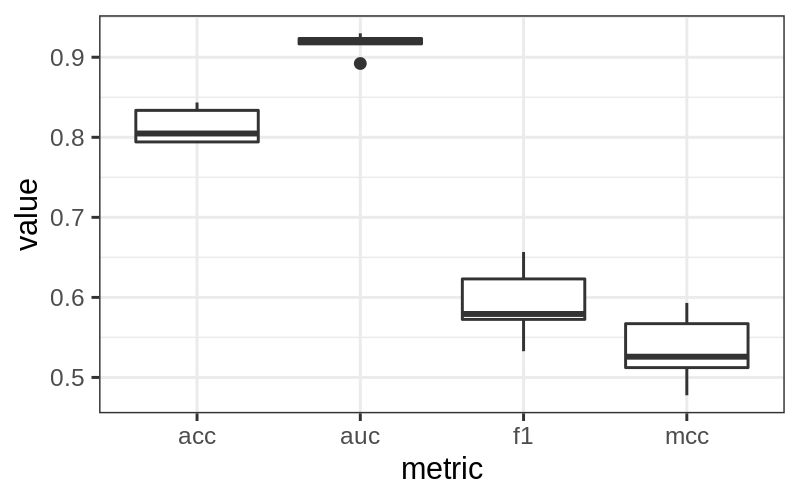

In [43]:
# performance
cls_perf(res)

In [44]:
# getting feat imp
feat_imp = get_feat_imp(res)
feat_imp 

cv_rep,variable,importance
<int>,<chr>,<dbl>
1,nobs,0.001785185
1,shannon,0.004111111
⋮,⋮,⋮
5,FDis_cogcat,0.005690566
5,RaoQ_cogcat,0.003652830


File written: /ebio/abt3_projects2/global_metagenome_diversity/ipynb/03_ML/.figures/c6c65b652bd734a088e99e4d02b11890.RDS 


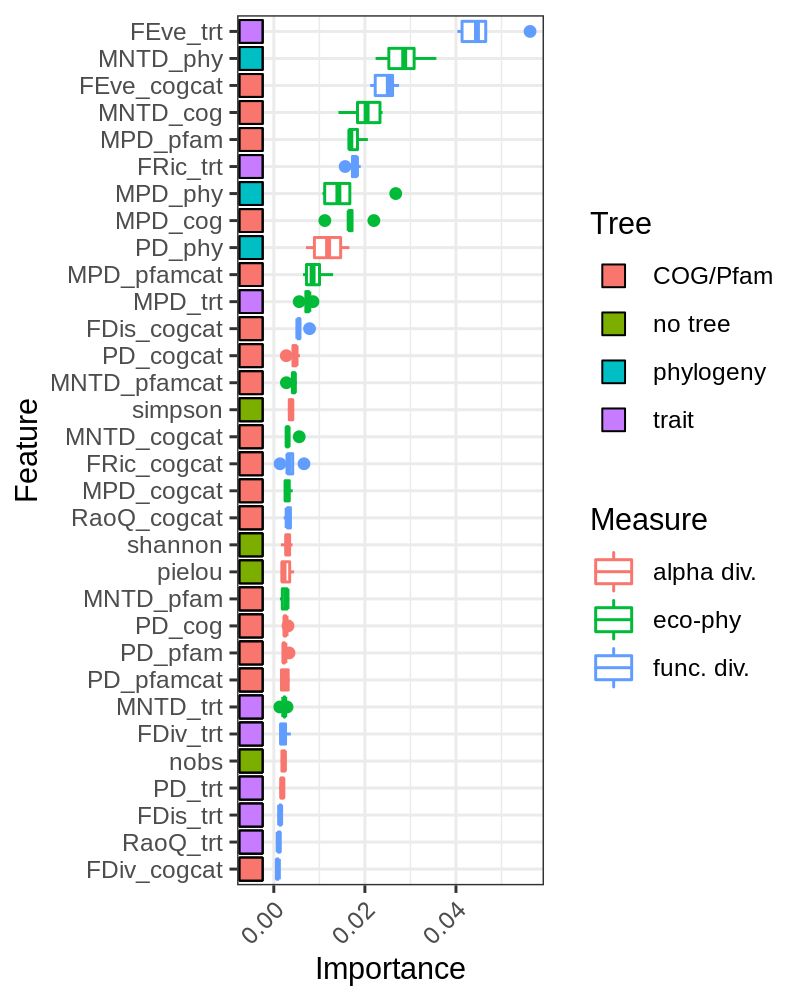

In [45]:
# plotting the most important features
p = plot_feat_imp(feat_imp, y_offset=-0.005)
p.dims(4,5)
Plot(p)

# Gender

In [48]:
target = 'gender'
measures = list(auc, acc, mcc, f1)
cv_iters = 5

In [49]:
# formatting
feats_f = feats %>%
    select.(-age, -BMI, -westernized, -disease) %>%
    mutate.(FDiv_cogcat = ifelse(is.na(FDiv_cogcat), 1, FDiv_cogcat)) %>%
    filter.(!is.na(gender),
            gender != '') %>%
    as.data.frame
rownames(feats_f) = feats_f$Sample
feats_f$Sample = NULL
feats_f

,dataset_name,gender,nobs,shannon,simpson,pielou,PD_phy,PD_trt,PD_cog,PD_cogcat,⋯,FRic_trt,FEve_trt,FDiv_trt,FDis_trt,RaoQ_trt,FRic_cogcat,FEve_cogcat,FDiv_cogcat,FDis_cogcat,RaoQ_cogcat
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A11_01_1FE,PasolliE_2018,male,233,3.576704,0.9286988,0.4375333,44.75908,38.87524,61.68524,21.51138,⋯,727.6456,0.5985831,0.6488497,5.962851,37.64543,0.001911215,0.6511331,0.8096961,0.08583902,0.009809411
A13_01_1FE,PasolliE_2018,male,250,4.438556,0.9763921,0.5429624,53.53982,43.40921,71.48026,26.68735,⋯,1022.0174,0.5965370,0.7739526,6.574219,45.30567,0.002462166,0.6610449,0.7932905,0.08931799,0.010776495
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YSZC12003_37879,XieH_2016,female,196,3.230018,0.8847015,0.3951236,36.05868,34.46728,56.48618,20.88889,⋯,650.2008,0.5776092,0.9153217,7.886338,63.80604,0.001636646,0.6212355,0.9129763,0.1774742,0.03343108
YSZC12003_37880,XieH_2016,female,267,3.703088,0.9290237,0.4529936,45.58852,45.64780,77.83160,27.07221,⋯,1250.0385,0.5858401,0.8503177,7.708019,61.99451,0.002654257,0.6081257,0.7892259,0.1400746,0.02553194


In [50]:
# summary
## target
feats_f[,target] %>% table
## all features
feats_f %>% summary

.
female   male 
  1102    723 

 dataset_name          gender               nobs          shannon     
 Length:1825        Length:1825        Min.   : 84.0   Min.   :1.365  
 Class :character   Class :character   1st Qu.:238.0   1st Qu.:3.694  
 Mode  :character   Mode  :character   Median :279.0   Median :4.154  
                                       Mean   :274.5   Mean   :4.020  
                                       3rd Qu.:315.0   3rd Qu.:4.449  
                                       Max.   :455.0   Max.   :5.218  
    simpson           pielou           PD_phy          PD_trt     
 Min.   :0.4596   Min.   :0.1670   Min.   :15.57   Min.   :12.24  
 1st Qu.:0.9325   1st Qu.:0.4519   1st Qu.:44.30   1st Qu.:40.43  
 Median :0.9620   Median :0.5081   Median :53.51   Median :48.41  
 Mean   :0.9431   Mean   :0.4917   Mean   :53.42   Mean   :47.49  
 3rd Qu.:0.9750   3rd Qu.:0.5443   3rd Qu.:62.39   3rd Qu.:55.47  
 Max.   :0.9892   Max.   :0.6384   Max.   :88.85   Max.   :82.75  
     PD_cog         PD_cogcat     

## RF

In [51]:
# creating mlr task
tsk = makeClassifTask(data = feats_f %>% select(-dataset_name), 
                      target = target, 
                      blocking = feats_f$dataset_name %>% as.factor)
tsk

Supervised task: feats_f %>% select(-dataset_name)
Type: classif
Target: gender
Observations: 1825
Features:
   numerics     factors     ordered functionals 
         32           0           0           0 
Missings: FALSE
Has weights: FALSE
Has blocking: TRUE
Has coordinates: FALSE
Classes: 2
female   male 
  1102    723 
Positive class: female

In [52]:
# what sampling rate to use?
rate = 1/1.5
undersample(tsk, rate = rate)

Supervised task: feats_f %>% select(-dataset_name)
Type: classif
Target: gender
Observations: 1458
Features:
   numerics     factors     ordered functionals 
         32           0           0           0 
Missings: FALSE
Has weights: FALSE
Has blocking: TRUE
Has coordinates: FALSE
Classes: 2
female   male 
   735    723 
Positive class: female

In [53]:
## feature selection (wrapping the RF learner)
lrn = makeLearner('classif.cforest', predict.type = 'prob', 
                  ntree = 500, maxdepth = 4)
lrn

Learner classif.cforest from package party
Type: classif
Name: Random forest based on conditional inference trees; Short name: cforest
Class: classif.cforest
Properties: twoclass,multiclass,prob,factors,numerics,ordered,weights,missings,featimp
Predict-Type: prob
Hyperparameters: ntree=500,maxdepth=4


In [54]:
# sampling
lrn = makeUndersampleWrapper(lrn, usw.rate = rate)
lrn

Learner classif.cforest.undersampled from package mlr,party
Type: classif
Name: ; Short name: 
Class: UndersampleWrapper
Properties: numerics,factors,ordered,missings,weights,prob,twoclass,multiclass,featimp
Predict-Type: prob
Hyperparameters: ntree=500,maxdepth=4,usw.rate=0.667


In [55]:
## evaluation 
parallelStartMulticore(cpus=threads, level = 'mlr.resample')
rs = makeResampleDesc('CV', iters = cv_iters)
res = resample(lrn, tsk, 
               resampling = rs,  
               models = TRUE,
               measures = measures)
parallelStop()

Starting parallelization in mode=multicore with cpus=8.

Resampling: cross-validation

Measures:             auc       acc       mcc       f1        

Mapping in parallel: mode = multicore; level = mlr.resample; cpus = 8; elements = 5.




Aggregated Result: auc.test.mean=0.6707949,acc.test.mean=0.6208219,mcc.test.mean=0.2246790,f1.test.mean=0.6744712




Stopped parallelization. All cleaned up.



### Performance

In [56]:
df.dims(30)
perf_res[['gender_RF']] = res$measures.test
res$measures.test
df.dims()

iter,auc,acc,mcc,f1
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.6394004,0.6027397,0.1875745,0.6635731
2,0.6465347,0.6054795,0.1868785,0.6635514
3,0.6611682,0.6109589,0.2082326,0.6570048
4,0.7184695,0.6410959,0.2898952,0.6797066
5,0.6884017,0.6438356,0.2508140,0.7085202


--AUC--
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6394  0.6465  0.6612  0.6708  0.6884  0.7185 
--F1--
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6570  0.6636  0.6636  0.6745  0.6797  0.7085 
--plot--


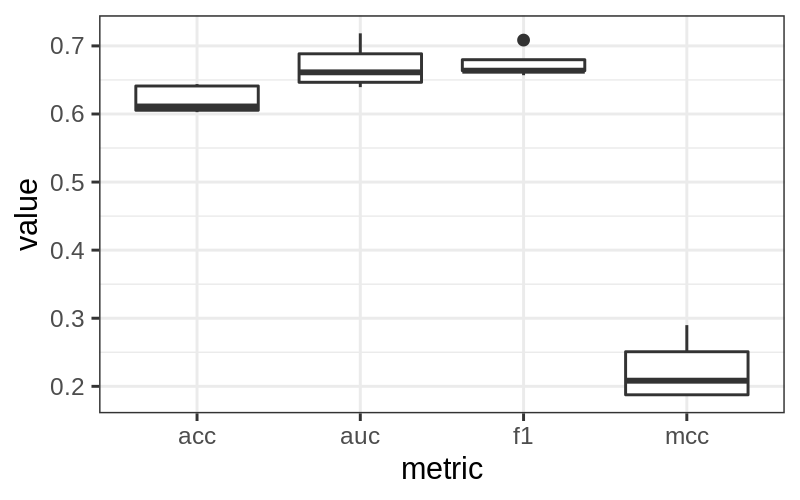

In [57]:
# performance
cls_perf(res)

In [58]:
# getting feat imp
feat_imp = get_feat_imp(res)
feat_imp

cv_rep,variable,importance
<int>,<chr>,<dbl>
1,nobs,0.002609302
1,shannon,0.000827907
⋮,⋮,⋮
5,FDis_cogcat,0.0012494172
5,RaoQ_cogcat,0.0004335664


File written: /ebio/abt3_projects2/global_metagenome_diversity/ipynb/03_ML/.figures/44b92654afaf2eb29bc6063ea6bb6ad0.RDS 


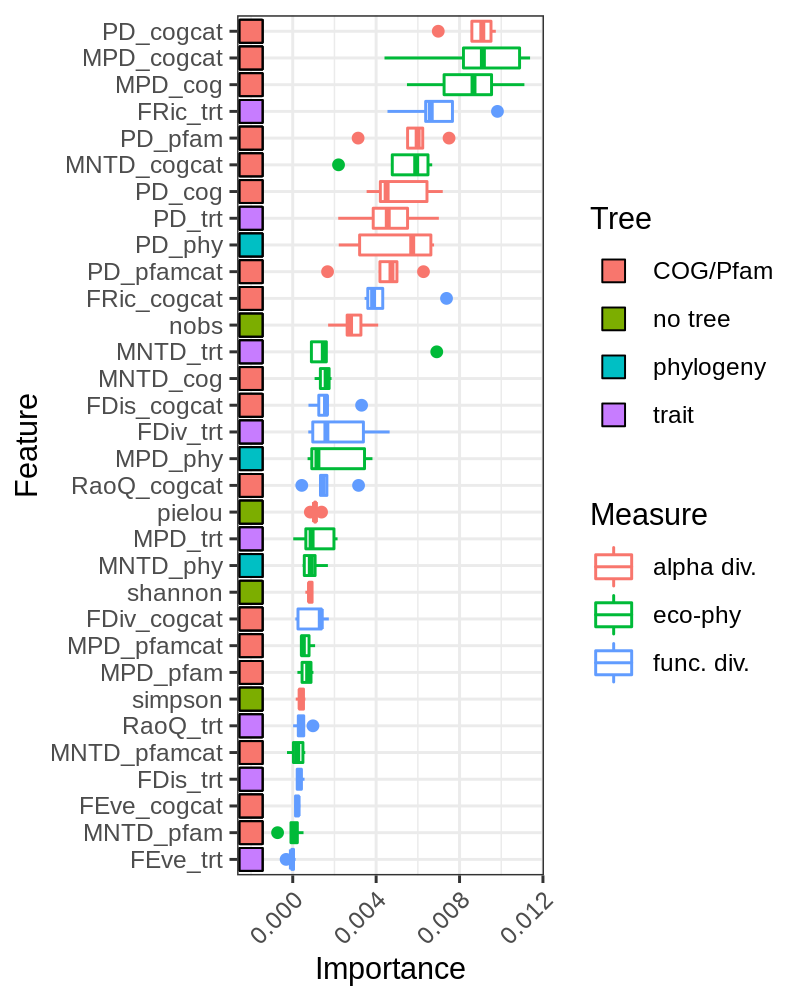

In [59]:
# plotting the most important features
p = plot_feat_imp(feat_imp, y_offset=-0.002)
p.dims(4,5)
Plot(p)

# Disease

In [63]:
target = 'disease'
measures = list(auc, acc, mcc, f1)
cv_iters = 5

In [64]:
# formatting
feats_f = feats %>%
    select.(-age, -BMI, -westernized, -gender) %>%
    mutate.(FDiv_cogcat = ifelse(is.na(FDiv_cogcat), 1, FDiv_cogcat)) %>%
    filter.(!is.na(disease),
            disease != '') %>%
    as.data.frame
rownames(feats_f) = feats_f$Sample
feats_f$Sample = NULL
feats_f

,dataset_name,disease,nobs,shannon,simpson,pielou,PD_phy,PD_trt,PD_cog,PD_cogcat,⋯,FRic_trt,FEve_trt,FDiv_trt,FDis_trt,RaoQ_trt,FRic_cogcat,FEve_cogcat,FDiv_cogcat,FDis_cogcat,RaoQ_cogcat
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A01_02_1FE,PasolliE_2018,healthy,232,3.888802,0.9507426,0.4757117,55.94272,43.94092,73.48643,28.29848,⋯,1281.648,0.6305736,0.7250427,6.970392,52.69103,0.001963384,0.6300577,0.8344220,0.1390624,0.02458852
A02_01_1FE,PasolliE_2018,healthy,176,3.418777,0.8891672,0.4182143,40.24502,31.18437,50.07578,20.65005,⋯,860.518,0.5762672,0.8080909,6.338391,45.45341,0.001858941,0.6244829,0.8111916,0.1164369,0.01988324
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
nHMX11726,LiJ_2017,healthy,272,3.612832,0.8932187,0.4419526,53.11264,46.47031,88.09736,34.25477,⋯,581.4522,0.5773349,0.8226567,5.954451,37.63154,0.0012117563,0.6201434,0.6032538,0.06340579,0.005202252
scavenger.11.60.0,CosteaPI_2017,healthy,210,3.891553,0.9557596,0.4760482,37.27697,35.63946,64.59389,22.62152,⋯,158.4517,0.5402863,0.5368664,5.515205,31.73553,0.0009740577,0.5382320,0.6360507,0.07027430,0.005815837


In [65]:
# summary
## target
feats_f[,target] %>% table
## all features
feats_f %>% summary

.
diseased  healthy 
    1170     1773 

 dataset_name         disease               nobs          shannon      
 Length:2943        Length:2943        Min.   : 23.0   Min.   :0.7248  
 Class :character   Class :character   1st Qu.:236.0   1st Qu.:3.6358  
 Mode  :character   Mode  :character   Median :279.0   Median :4.1292  
                                       Mean   :273.5   Mean   :3.9862  
                                       3rd Qu.:316.0   3rd Qu.:4.4516  
                                       Max.   :469.0   Max.   :5.2184  
    simpson           pielou            PD_phy           PD_trt      
 Min.   :0.2267   Min.   :0.08866   Min.   : 8.175   Min.   : 5.864  
 1st Qu.:0.9282   1st Qu.:0.44477   1st Qu.:43.611   1st Qu.:39.880  
 Median :0.9601   Median :0.50512   Median :53.385   Median :48.185  
 Mean   :0.9383   Mean   :0.48763   Mean   :53.177   Mean   :47.116  
 3rd Qu.:0.9749   3rd Qu.:0.54456   3rd Qu.:62.574   3rd Qu.:55.473  
 Max.   :0.9897   Max.   :0.63836   Max.   :93.614   Max.   :83.860  
     P

## RF

In [66]:
# creating mlr task
tsk = makeClassifTask(data = feats_f %>% select(-dataset_name), 
                      target = target, 
                      blocking = feats_f$dataset_name %>% as.factor)
tsk

Supervised task: feats_f %>% select(-dataset_name)
Type: classif
Target: disease
Observations: 2943
Features:
   numerics     factors     ordered functionals 
         32           0           0           0 
Missings: FALSE
Has weights: FALSE
Has blocking: TRUE
Has coordinates: FALSE
Classes: 2
diseased  healthy 
    1170     1773 
Positive class: diseased

In [67]:
# what sampling rate to use?
rate = 1/1.5
undersample(tsk, rate = rate)

Supervised task: feats_f %>% select(-dataset_name)
Type: classif
Target: disease
Observations: 2352
Features:
   numerics     factors     ordered functionals 
         32           0           0           0 
Missings: FALSE
Has weights: FALSE
Has blocking: TRUE
Has coordinates: FALSE
Classes: 2
diseased  healthy 
    1170     1182 
Positive class: diseased

In [68]:
## feature selection (wrapping the RF learner)
lrn = makeLearner('classif.cforest', predict.type = 'prob', 
                  ntree = 500, maxdepth = 4)
lrn

Learner classif.cforest from package party
Type: classif
Name: Random forest based on conditional inference trees; Short name: cforest
Class: classif.cforest
Properties: twoclass,multiclass,prob,factors,numerics,ordered,weights,missings,featimp
Predict-Type: prob
Hyperparameters: ntree=500,maxdepth=4


In [69]:
# sampling
lrn = makeUndersampleWrapper(lrn, usw.rate = rate)
lrn

Learner classif.cforest.undersampled from package mlr,party
Type: classif
Name: ; Short name: 
Class: UndersampleWrapper
Properties: numerics,factors,ordered,missings,weights,prob,twoclass,multiclass,featimp
Predict-Type: prob
Hyperparameters: ntree=500,maxdepth=4,usw.rate=0.667


In [70]:
## evaluation 
parallelStartMulticore(cpus=threads, level = 'mlr.resample')
rs = makeResampleDesc('CV', iters = cv_iters)
res = resample(lrn, tsk, 
               resampling = rs,  
               models = TRUE,
               measures = measures)
parallelStop()

Starting parallelization in mode=multicore with cpus=8.

Resampling: cross-validation

Measures:             auc       acc       mcc       f1        

Mapping in parallel: mode = multicore; level = mlr.resample; cpus = 8; elements = 5.




Aggregated Result: auc.test.mean=0.7436378,acc.test.mean=0.6822869,mcc.test.mean=0.3480758,f1.test.mean=0.6166824




Stopped parallelization. All cleaned up.



### Performance

In [71]:
df.dims(30)
perf_res[['disease_RF']] = res$measures.test
res$measures.test
df.dims()

iter,auc,acc,mcc,f1
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.7185498,0.6479592,0.2778396,0.5731959
2,0.7501211,0.6870748,0.3567227,0.6213992
3,0.7354014,0.6672326,0.3184425,0.6064257
4,0.7656795,0.7028862,0.3858107,0.6361746
5,0.7484371,0.7062818,0.4015636,0.6462168


--AUC--
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7185  0.7354  0.7484  0.7436  0.7501  0.7657 
--F1--
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5732  0.6064  0.6214  0.6167  0.6362  0.6462 
--plot--


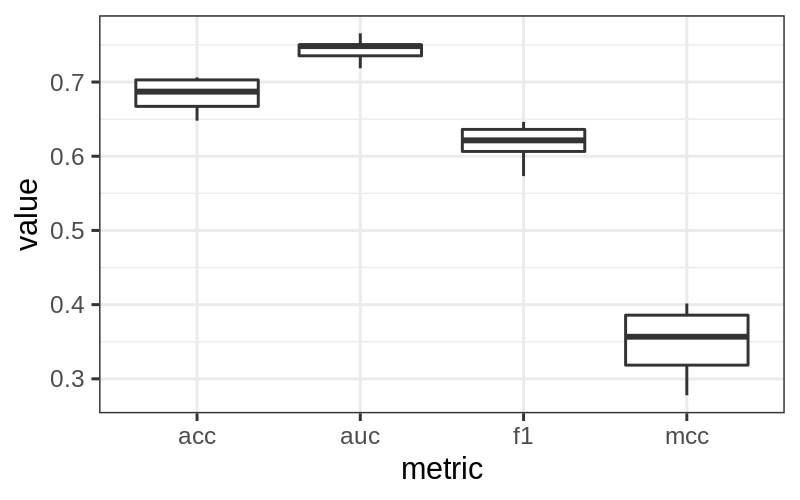

In [72]:
# performance
cls_perf(res)

In [73]:
# getting feature importance
feat_imp = get_feat_imp(res)
feat_imp

cv_rep,variable,importance
<int>,<chr>,<dbl>
1,nobs,0.002432900
1,shannon,0.001607504
⋮,⋮,⋮
5,FDis_cogcat,0.01269553
5,RaoQ_cogcat,0.01372006


File written: /ebio/abt3_projects2/global_metagenome_diversity/ipynb/03_ML/.figures/eb0394ff87501693cb1f9786109f58b7.RDS 


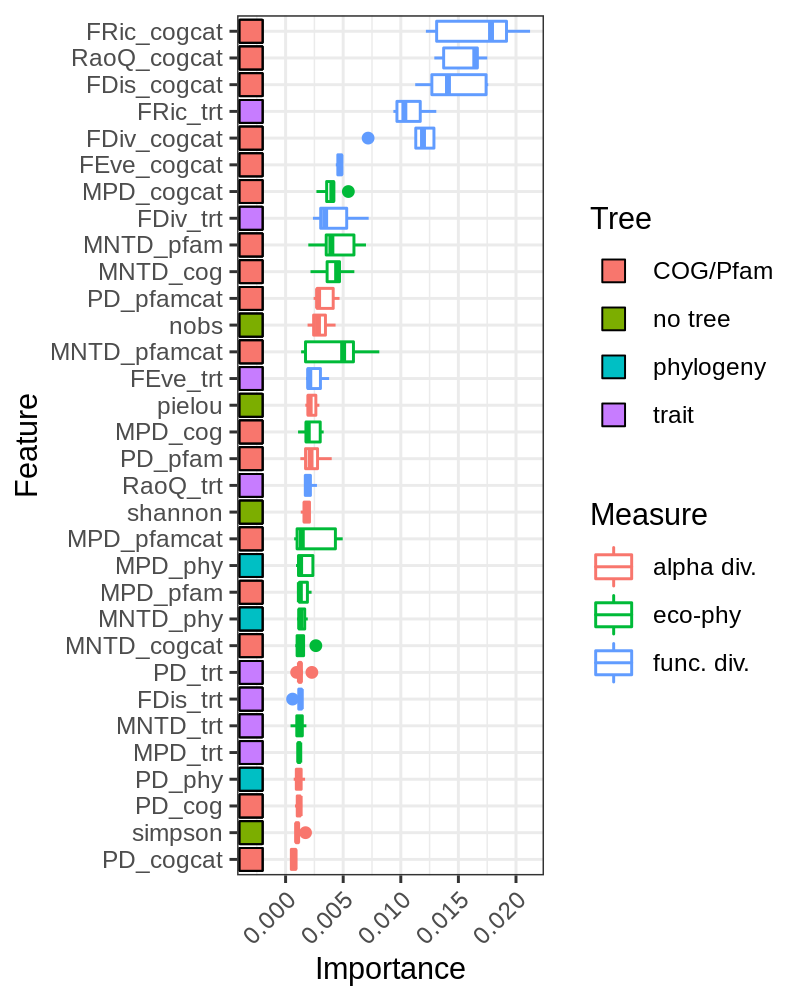

In [74]:
# plotting the most important features
p = plot_feat_imp(feat_imp, y_offset=-0.003)
p.dims(4,5)
Plot(p)

# Performance summary

In [75]:
# formatting
perf_res_f = perf_res %>%
    rbindlist(use.names=TRUE, idcol='dataset') %>%
    separate.(dataset, c('target', 'model'), sep='_') %>%
    filter.(model == 'RF') %>%
    select.(iter, auc, f1, target) %>%
    pivot_longer.(cols=c(auc, f1), names_to='measure', values_to='value') 
perf_res_f

iter,target,measure,value
<int>,<chr>,<chr>,<dbl>
1,westernized,auc,0.8921762
2,westernized,auc,0.9200980
⋮,⋮,⋮,⋮
4,disease,f1,0.6361746
5,disease,f1,0.6462168


File written: /ebio/abt3_projects2/global_metagenome_diversity/ipynb/03_ML/.figures/a4706526029ce4921c0030e392359395.RDS 


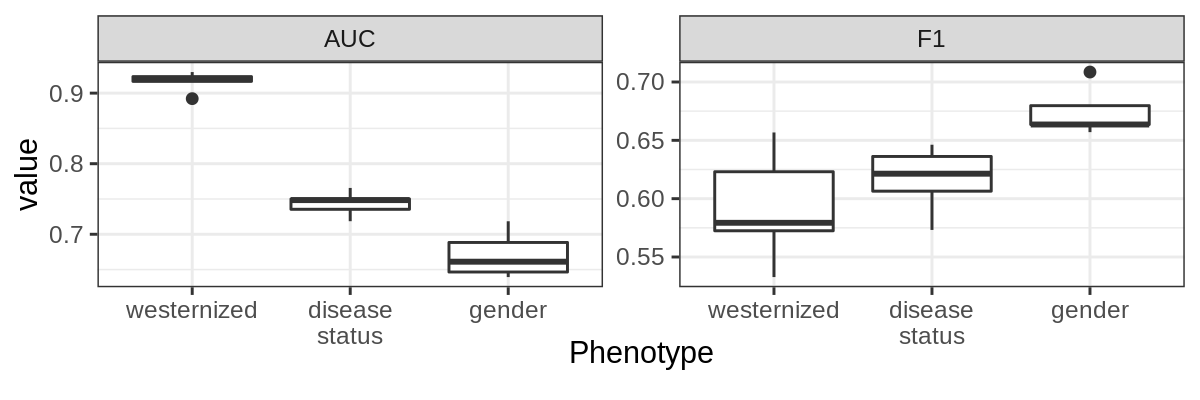

In [76]:
# plotting
p = perf_res_f %>%
    mutate.(target = ifelse(target == 'disease', 'disease\nstatus', target)) %>%
    mutate.(measure = case_when.(measure == 'auc' ~ 'AUC',
                                 measure == 'f1' ~ 'F1')) %>%
    mutate.(mean_value = mean(value),
            .by=c(target, measure)) %>%
    mutate.(target = target %>% reorder(-mean_value)) %>%
    ggplot(aes(target, value)) +
    geom_boxplot() +
    labs(x='Phenotype') +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw() +
    theme(
        axis.title.x = element_text(vjust=4)
    )
p.dims(6,2)
Plot(p)

#### Writing table

In [77]:
F = file.path(work_dir, 'alpha-div_ml_dsBlock_performance.tsv')
write_table(perf_res_f, F)

File written: /ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/ML//alpha-div_ml_dsBlock_performance.tsv 


# sessionInfo

In [78]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects2/global_metagenome_diversity/envs/tidyverse-ml/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] parallelMap_1.5.1   randomForest_4.6-14 mlr_2.19.0         
 [4] ParamHelpers_1.14   Boruta_7.0.0        LeyLabRMisc_0.2.0  
 [7] doParallel_1.0.16   iterators_1.0.13    foreach_1.5.1      
[10] tidytable_0.6.5     data.table_1.14.2   ggplot2_3.3.5      